In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 
  
# data (as pandas dataframes) 
X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets 
  
# metadata 
print(polish_companies_bankruptcy.metadata) 
  
# variable information 
print(polish_companies_bankruptcy.variables) 

{'uci_id': 365, 'name': 'Polish Companies Bankruptcy', 'repository_url': 'https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data', 'data_url': 'https://archive.ics.uci.edu/static/public/365/data.csv', 'abstract': 'The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 10503, 'num_features': 65, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5F600', 'creators': ['Sebastian Tomczak'], 'intro_paper': {'ID': 417, 'type': 'NATIVE', 'title': 'Ensemble boosted trees with synthetic features generation in application to bankruptcy predictio

In [3]:
print(polish_companies_bankruptcy.metadata['additional_info'])

{'summary': 'The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.\r\nBasing on the collected data five classification cases were distinguished, that depends on the forecasting period:\r\n- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.\r\n- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. 

In [4]:
print(polish_companies_bankruptcy.metadata['additional_info']['summary'])

The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 1017

In [5]:
print(polish_companies_bankruptcy.metadata['additional_info']['variable_info'])

X1	net profit / total assets
X2	total liabilities / total assets
X3	working capital / total assets
X4	current assets / short-term liabilities
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
X6	retained earnings / total assets
X7	EBIT / total assets
X8	book value of equity / total liabilities
X9	sales / total assets
X10	equity / total assets
X11	(gross profit + extraordinary items + financial expenses) / total assets
X12	gross profit / short-term liabilities
X13	(gross profit + depreciation) / sales
X14	(gross profit + interest) / total assets
X15	(total liabilities * 365) / (gross profit + depreciation)
X16	(gross profit + depreciation) / total liabilities
X17	total assets / total liabilities
X18	gross profit / total assets
X19	gross profit / sales
X20	(inventory * 365) / sales
X21	sales (n) / sales (n-1)
X22	profit on operating activities / total assets
X23	net profit / sales
X24	gross profit (in 3 years) / total a

### EDA

In [6]:
X.columns

Index(['year', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40',
       'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50',
       'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60',
       'A61', 'A62', 'A63', 'A64'],
      dtype='object')

Mocno niezbalansowane

In [7]:
y.value_counts()

class
0        41314
1         2091
Name: count, dtype: int64

In [8]:
df = X 
target = y 
df['label'] = target
df['label_name'] = target.apply(lambda x: 'bankrupt' if x['class'] == 1.0 else 'non-baknrupt', axis=1)

In [9]:
attrs = df.columns[1:-2]
attrs

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41',
       'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51',
       'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61',
       'A62', 'A63', 'A64'],
      dtype='object')

In [10]:
df.shape

(43405, 67)

Text(0.5, 1.0, 'Distribution by year')

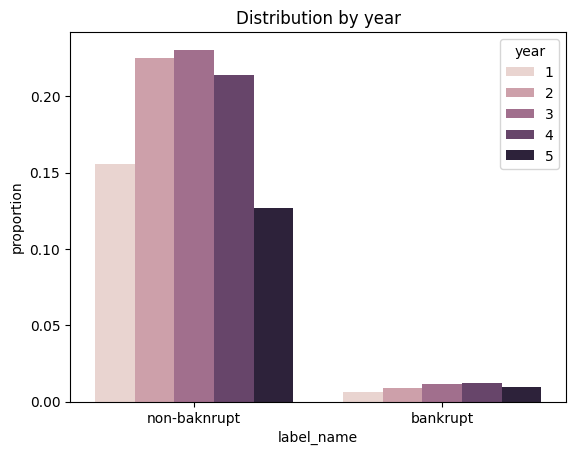

In [11]:
sns.countplot(
    df, x='label_name', hue='year', stat='proportion'
)
plt.title('Distribution by year')

Warto zauważyć bardzo duży zakres w danych, trzeba było użyć skalę logarytmiczną, żeby wykres miał sens

c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\julia\anaconda3\envs\mlds\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


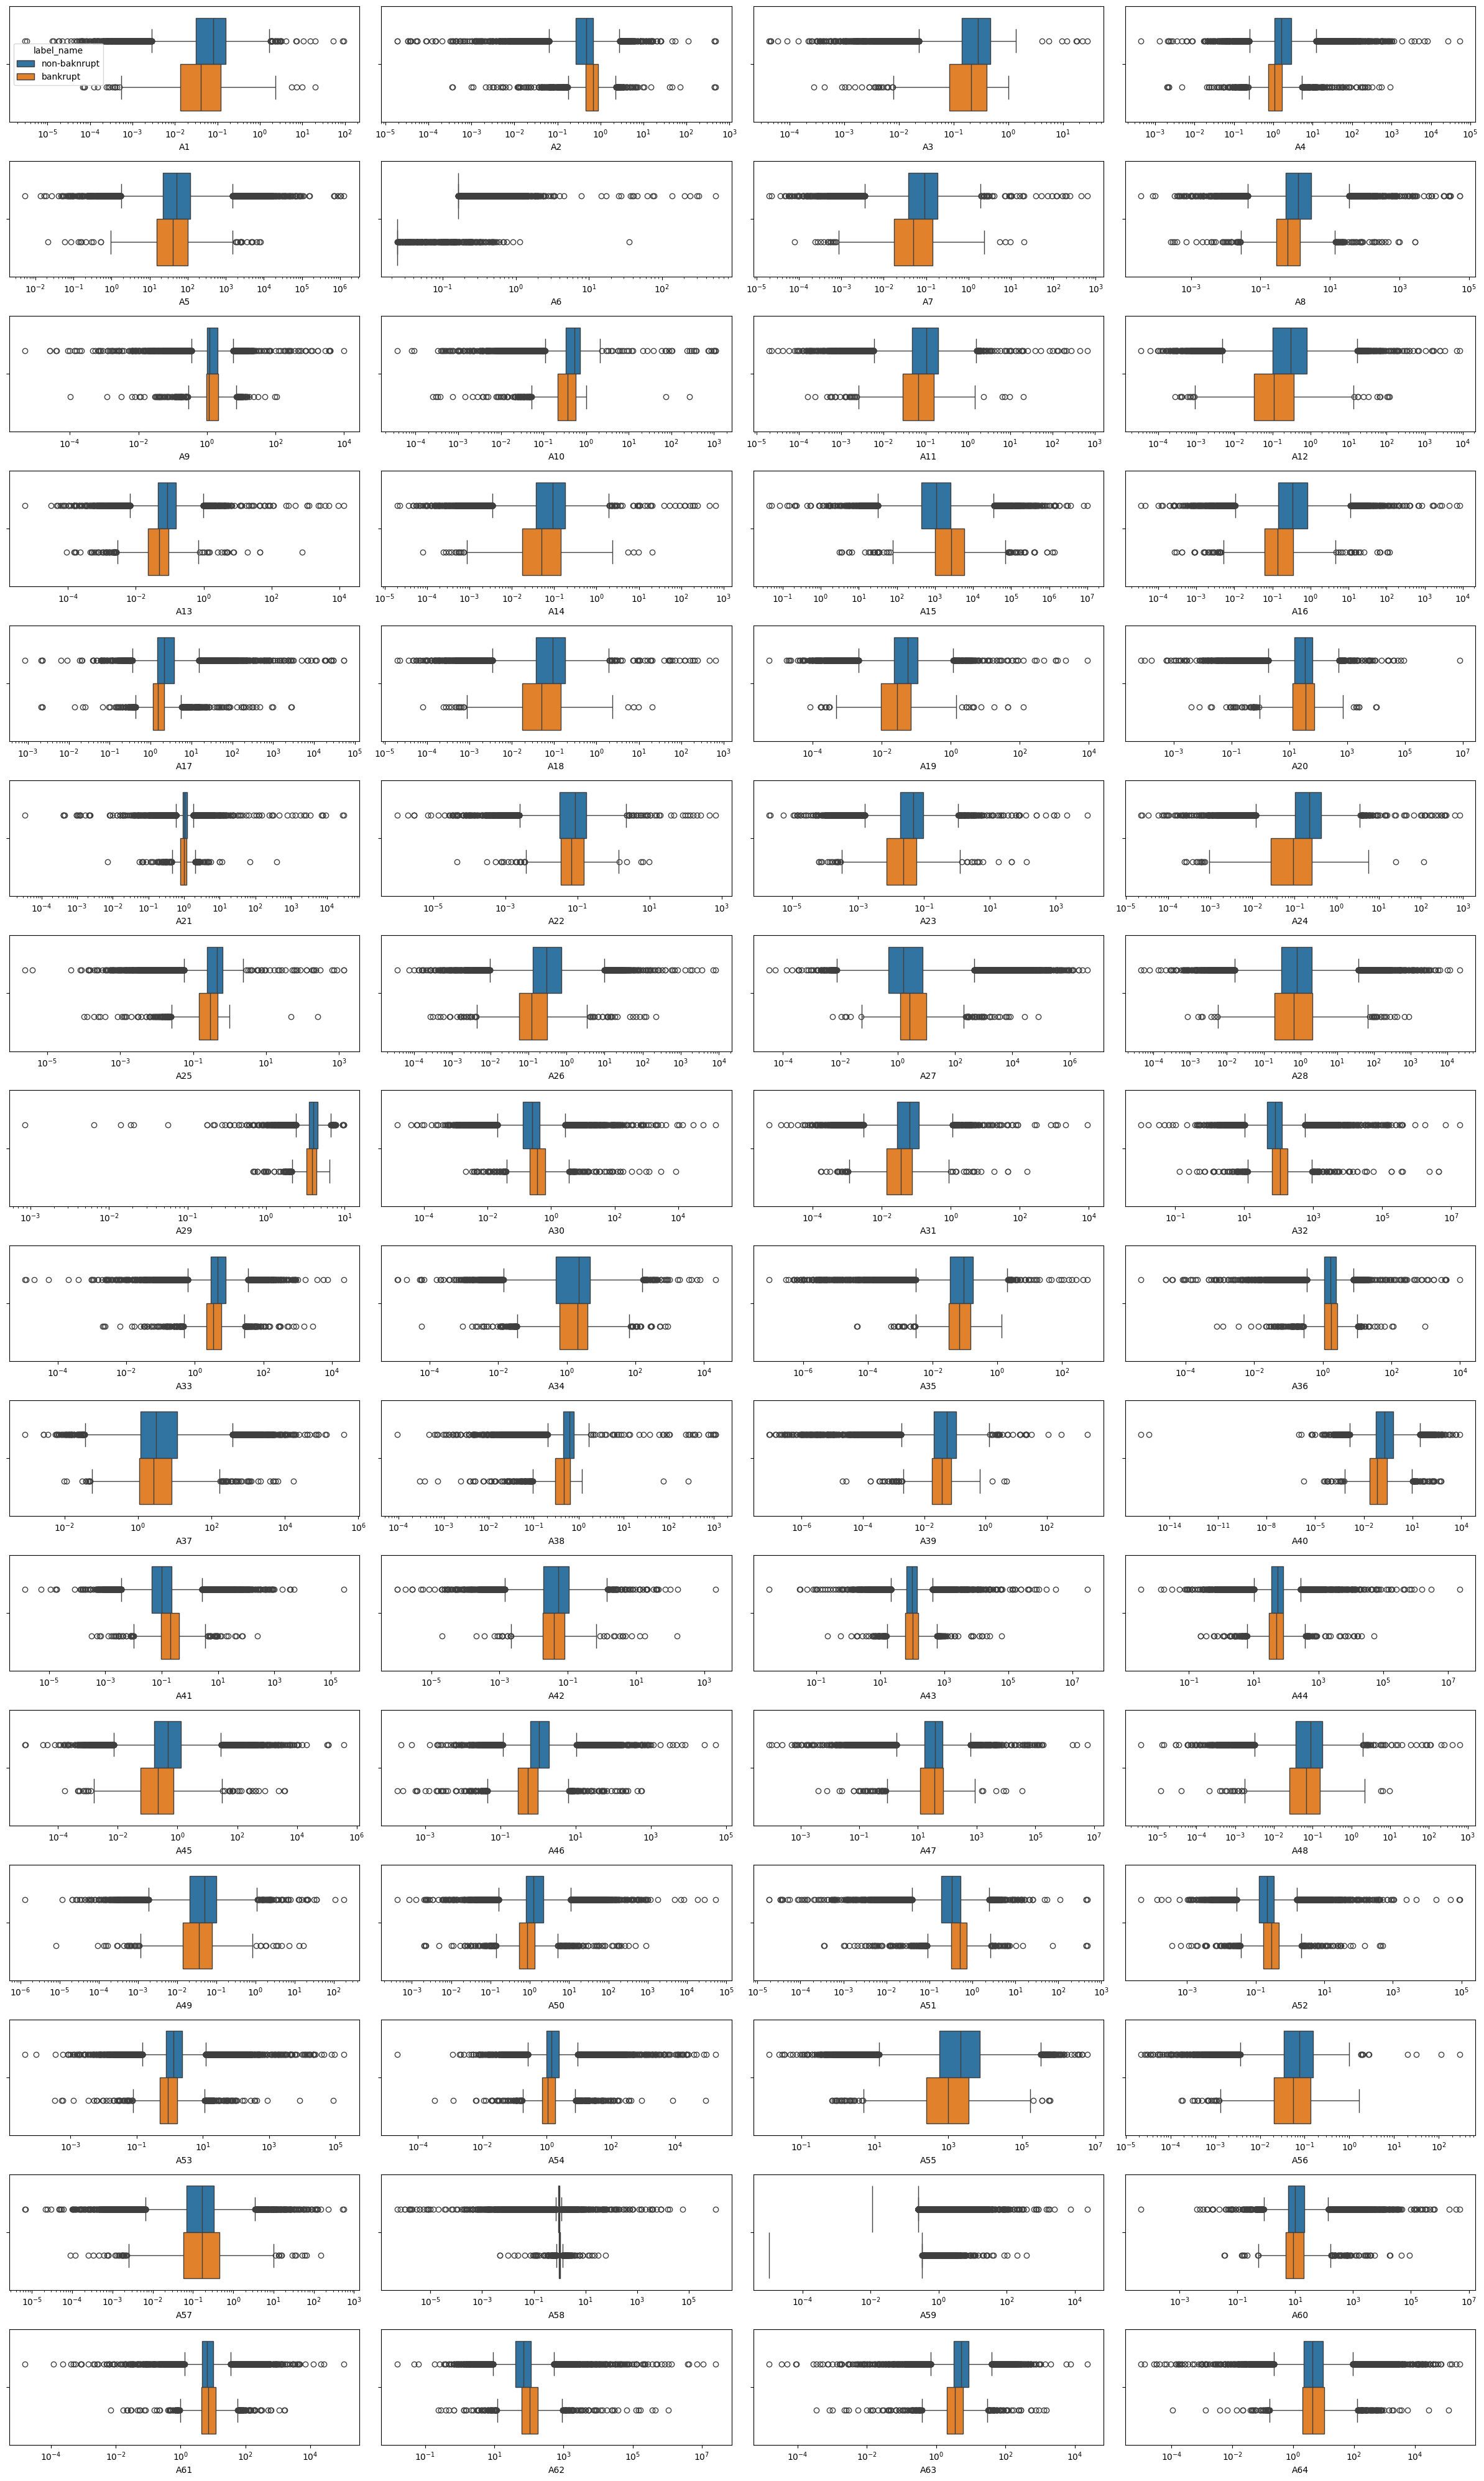

In [12]:
fig, axes = plt.subplots(16, 4, figsize=(24, 40))

axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(df, x=attrs[i], ax=ax, hue='label_name', log_scale=True, legend='auto' if i == 0 else False)
fig.tight_layout()

Tutaj co 10 wartość dla oszczędności czasu - niech skala logarytmiczna nie będzie myląca, bo jest dużo odstających wartości, nawet, gdy te rozkłady przypominają rozkłady normalne

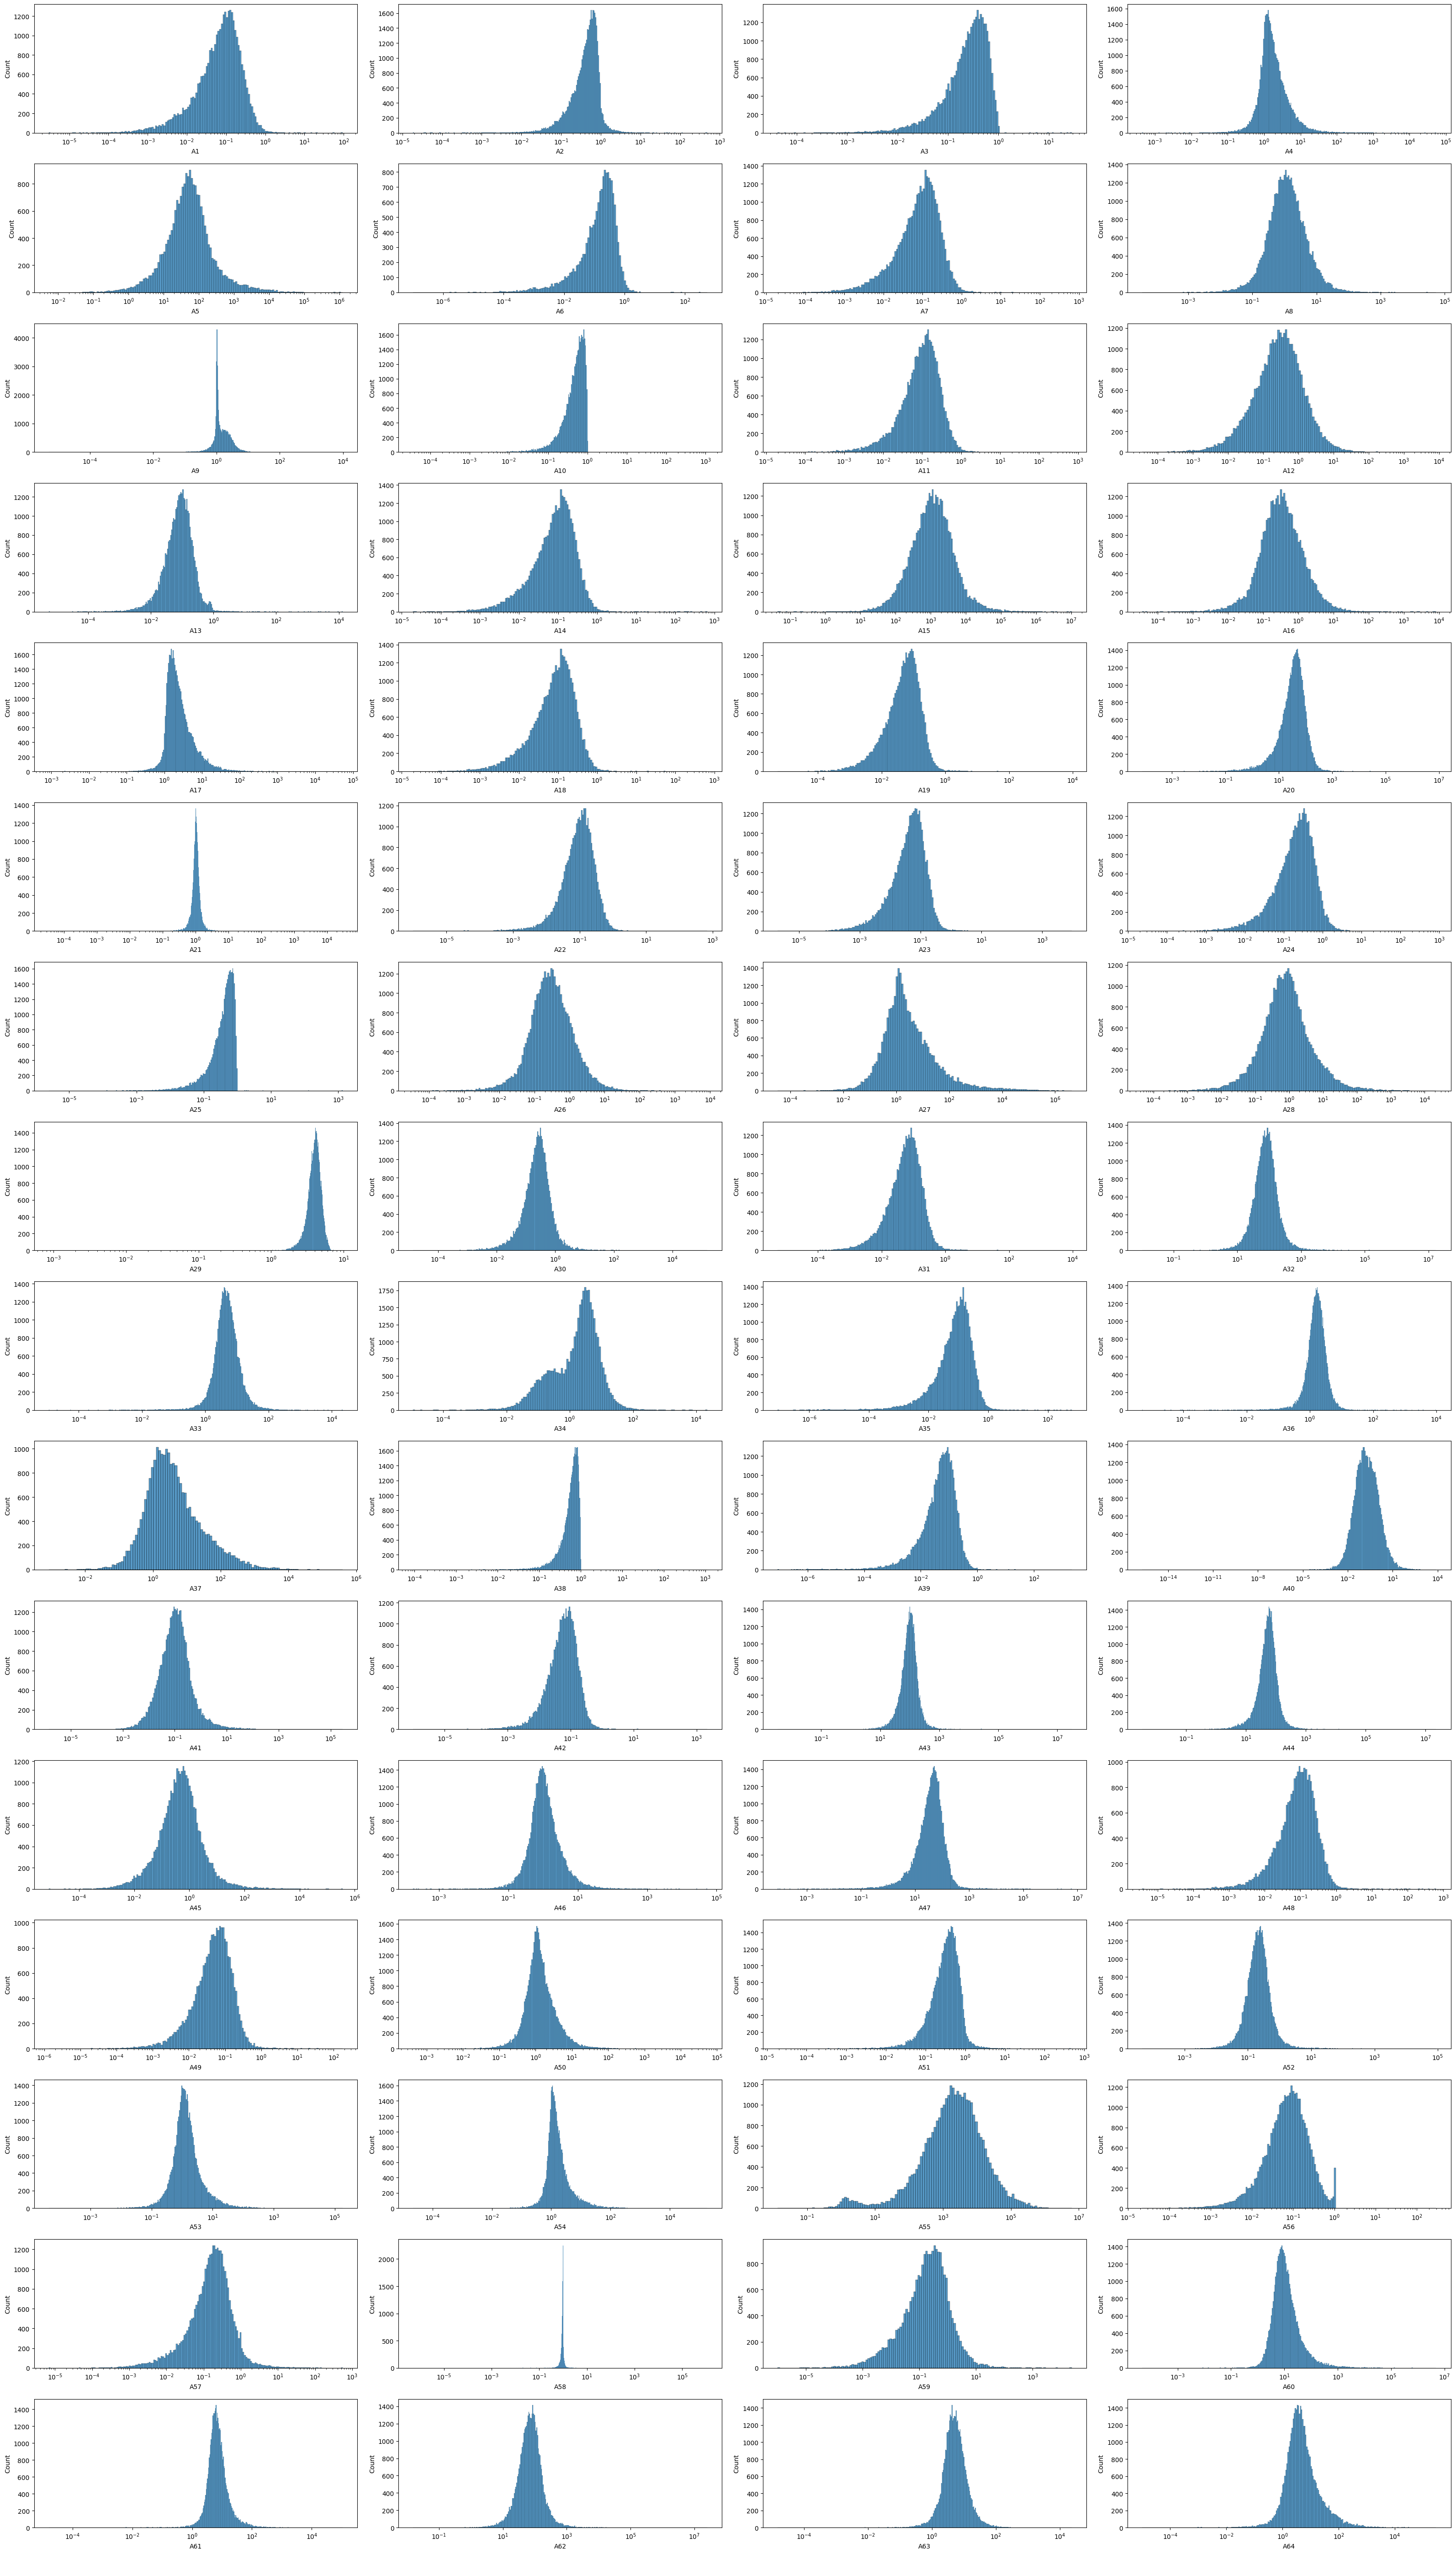

In [13]:
fig, axes = plt.subplots(16, 4, figsize=(32, 56))

axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.histplot(df, x=attrs[i], ax=ax, log_scale=True)

fig.tight_layout()

In [46]:
df_desc = df.describe()[attrs]

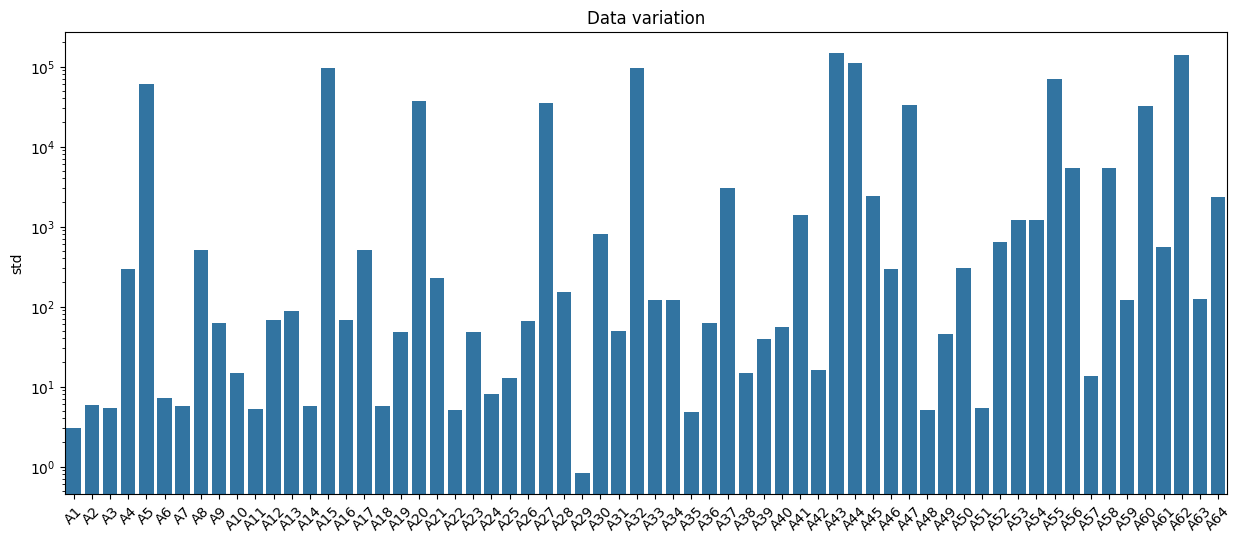

In [47]:
plt.figure(figsize=(15, 6))
sns.barplot(df_desc.loc['std'])
plt.title('Data variation')
plt.yscale('log')
_ = plt.xticks(rotation=45)

In [14]:
null_cols_percent = df[attrs].isnull().sum(axis=0) / df.shape[0]

In [15]:
null_cols_percent_labeled = df.groupby('label_name').agg(lambda x: (x.isnull().sum() / x.shape[0]))
null_cols_percent_labeled_long = null_cols_percent_labeled.unstack().reset_index().rename({'level_0': 'attribute', 0: 'count'}, axis=1)

In [16]:
null_cols_percent_labeled['A37'], null_cols_percent['A37'] # check

(label_name
 bankrupt        0.467241
 non-baknrupt    0.435857
 Name: A37, dtype: float64,
 0.4373689667089045)

X21	sales (n) / sales (n-1)

X27	profit on operating activities / financial expenses

X28	working capital / fixed assets

X37	(current assets - inventories) / long-term liabilities

X41	total liabilities / ((profit on operating activities + depreciation) * (12/365))

X45	net profit / inventory

X53	equity / fixed assets

X54	constant capital / fixed assets

X60	sales / inventory

X64	sales / fixed assets

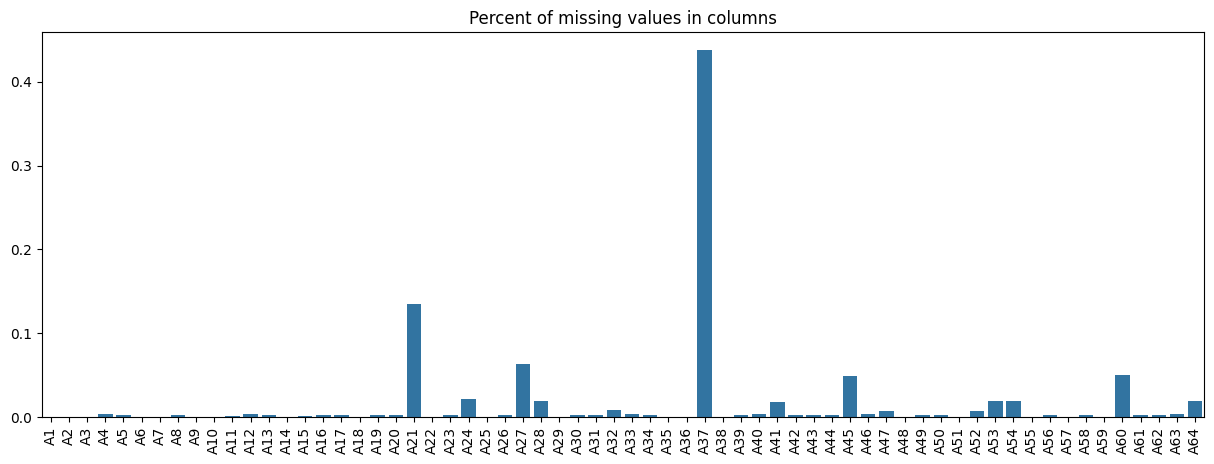

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(null_cols_percent)
plt.title('Percent of missing values in columns')
_ = plt.xticks(rotation=90)

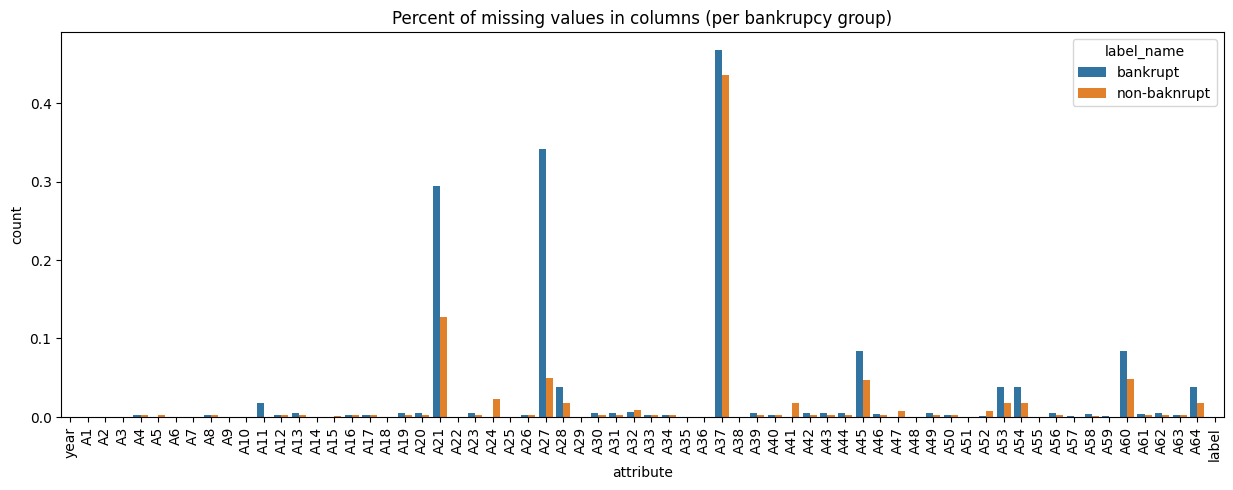

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(null_cols_percent_labeled_long, x='attribute', y='count', hue='label_name')
plt.title('Percent of missing values in columns (per bankrupcy group)')
_ = plt.xticks(rotation=90)

In [19]:
corr_matrix = df[attrs].corr()

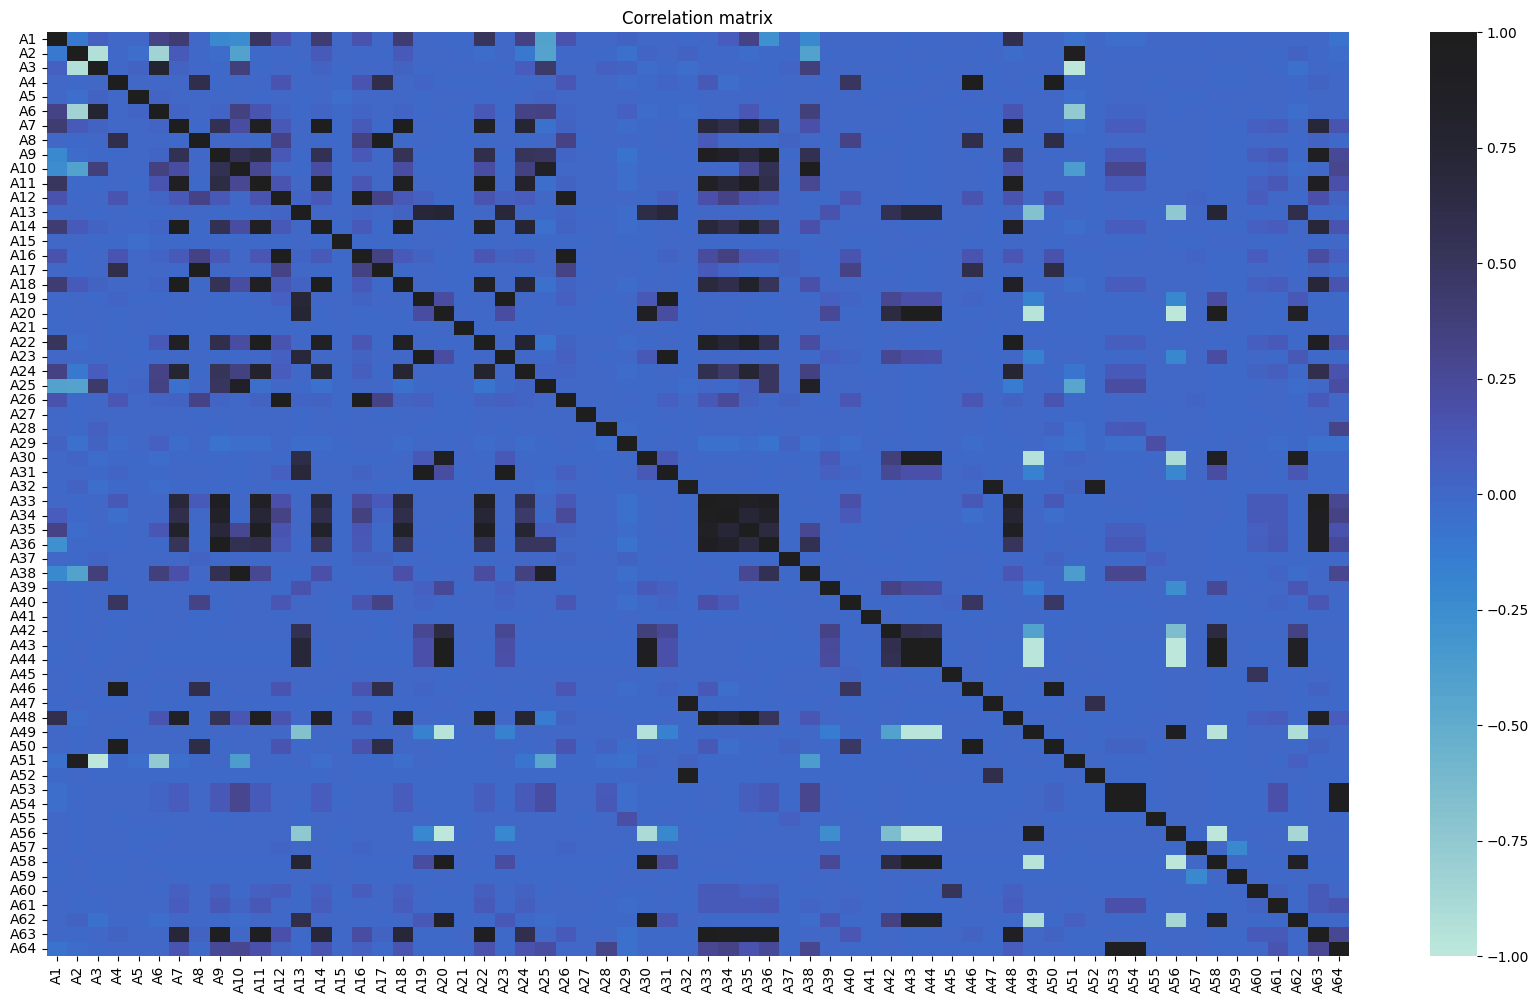

In [20]:
plt.figure(figsize=(21, 12))
sns.heatmap(
    corr_matrix,
    vmin=-1.0, vmax=1.0, center=True
)
_ = plt.title('Correlation matrix')

## Preprocessing

Podejście: napisanie różnych pipelinów sklearnowych i próbowanie z różnymi skalerami itd 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X[attrs], y, test_size=0.3, random_state=42, stratify=y)

Explained variance ratio: [0.14058117 0.11450729 0.08504817 0.08211548], (0.4222521109861041)


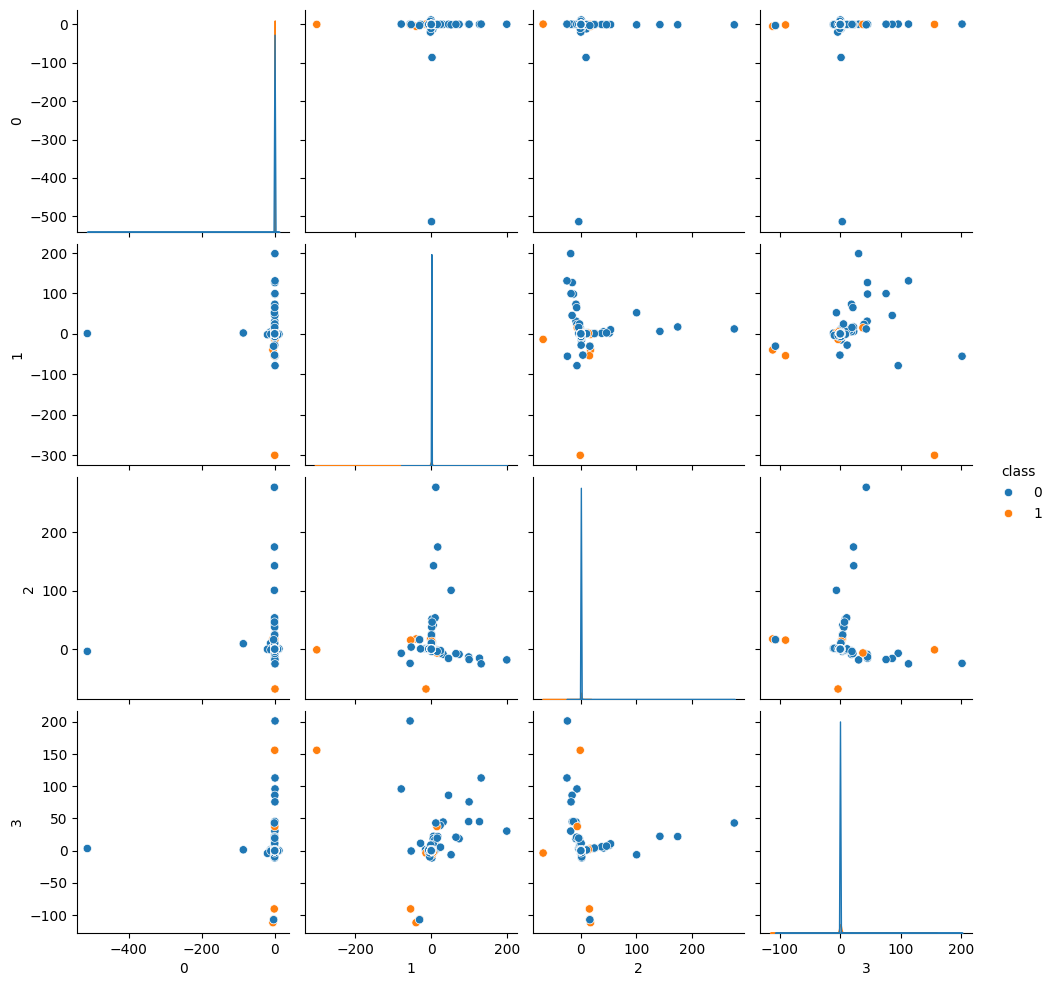

In [ ]:
# mozna z mean lub median
pipe_1 = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('standarization', StandardScaler()),
    ('pca', PCA(n_components=4))
])

X_train_1 = pipe_1.fit_transform(X_train)

print(f'Explained variance ratio: {pipe_1["pca"].explained_variance_ratio_}, ({sum(pipe_1["pca"].explained_variance_ratio_)})')

res_1_df = pd.concat([pd.DataFrame(X_train_1, index=X_train.index), pd.DataFrame(y_train)], axis=1)

sns.pairplot(res_1_df, hue='class')

Explained variance ratio: [0.99139824 0.00325731 0.00138707 0.00119855], (0.9972411712081134)


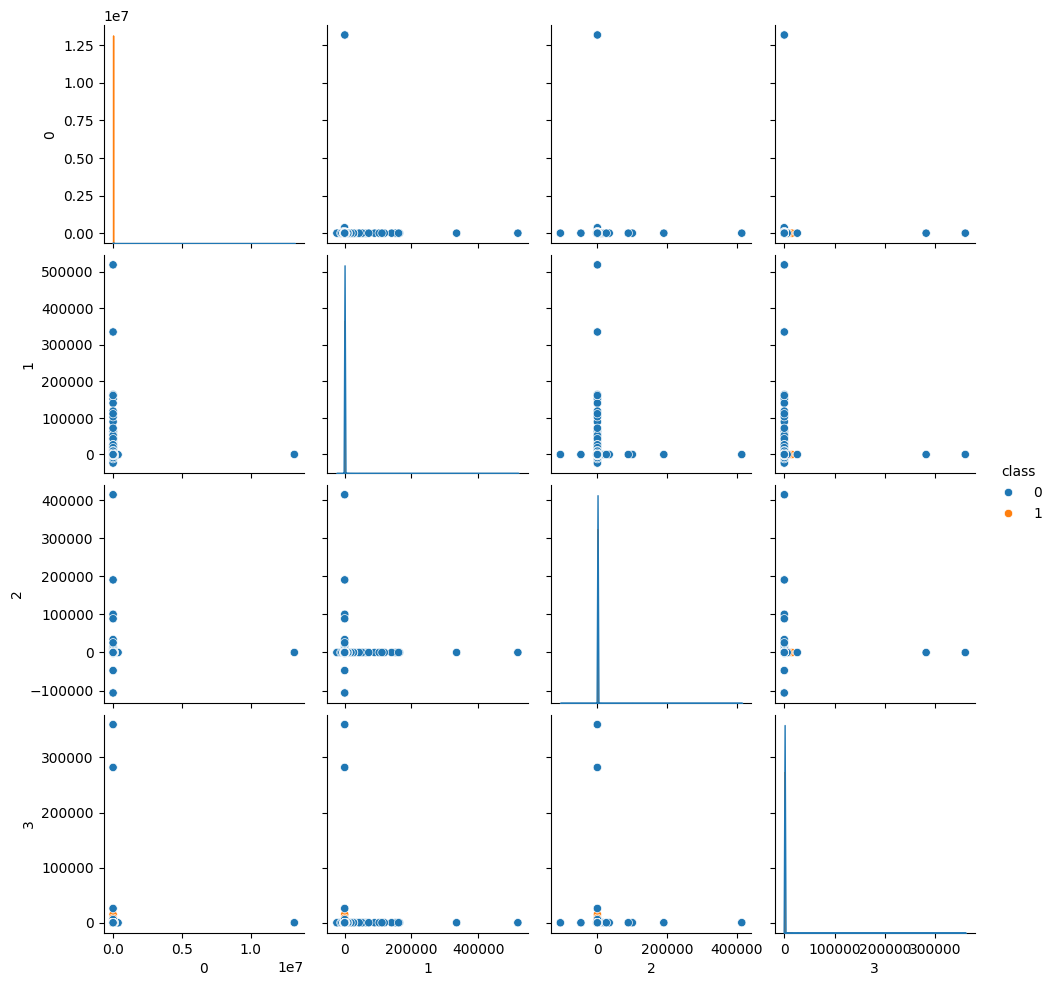

In [ ]:
# mozna z mean lub median
pipe_2 = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('standarization', RobustScaler()),
    ('pca', PCA(n_components=4))
])

X_train_2 = pipe_2.fit_transform(X_train)

print(f'Explained variance ratio: {pipe_2["pca"].explained_variance_ratio_}, ({sum(pipe_2["pca"].explained_variance_ratio_)})')

res_2_df = pd.concat([pd.DataFrame(X_train_2, index=X_train.index), pd.DataFrame(y_train)], axis=1)

sns.pairplot(res_2_df, hue='class')